## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing and Merging Data

In [1]:

# # Recommended versions
# numpy 	1.26.4
# pandas	2.2.2
# matplotlib	3.7.1
# seaborn	0.10.0
# statsmodels	0.14.4
# sklearn	1.5.2

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [4]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Combining all data files into one consolidated dataframe

In [7]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [8]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Step 2: Inspecting the Dataframe

In [9]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [10]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [11]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [12]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [13]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [14]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [15]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [16]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,False,False,False,True,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,True,False,False,False,True,True,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,False,False,False,False,True,True,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,True,False,False,False,False,True,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,False,False,False,True,False,False,True,False


In [17]:
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
ml.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,False,True,False
1,True,False,False
2,True,False,False
3,False,True,False
4,True,False,False


In [18]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], axis = 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], axis = 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], axis = 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], axis = 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], axis = 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], axis = 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], axis = 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [19]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,True,True,False,True,False,True,False,True,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,True,False,False,True,True,False,True,False,True,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,False,True,True,False,True,False,True,False,True,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,True,False,False,True,False,True,True,False,True,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,True,False,True,False,True,False,True,False,True,False


#### Dropping the repeated variables

In [20]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

In [21]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] =pd.to_numeric(telecom['TotalCharges'], errors='coerce') 

In [22]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

Now you can see that you have all variables as numeric.

#### Checking for Outliers

In [23]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [24]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [25]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [26]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [27]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [28]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Step 4: Test-Train Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,False,False,...,False,True,True,False,True,False,True,False,True,False
1,34,1,0,56.95,1889.50,0,0,0,True,False,...,True,False,False,True,True,False,True,False,True,False
2,2,1,1,53.85,108.15,0,0,0,False,False,...,False,True,True,False,True,False,True,False,True,False
3,45,0,0,42.30,1840.75,0,0,0,True,False,...,True,False,False,True,False,True,True,False,True,False
4,2,1,1,70.70,151.65,0,0,0,False,False,...,True,False,True,False,True,False,True,False,True,False


In [31]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [32]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,False,False,...,False,True,True,False,True,False,True,False,True,False
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,False,False,...,False,True,True,False,True,False,False,True,False,True
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,False,False,...,False,True,False,True,True,False,True,False,True,False
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,False,False,...,False,True,False,True,False,True,False,True,False,True
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,False,False,...,True,False,False,True,False,True,False,True,False,True


In [35]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

We have almost 27% churn rate

### Step 6: Looking at Correlations

In [36]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

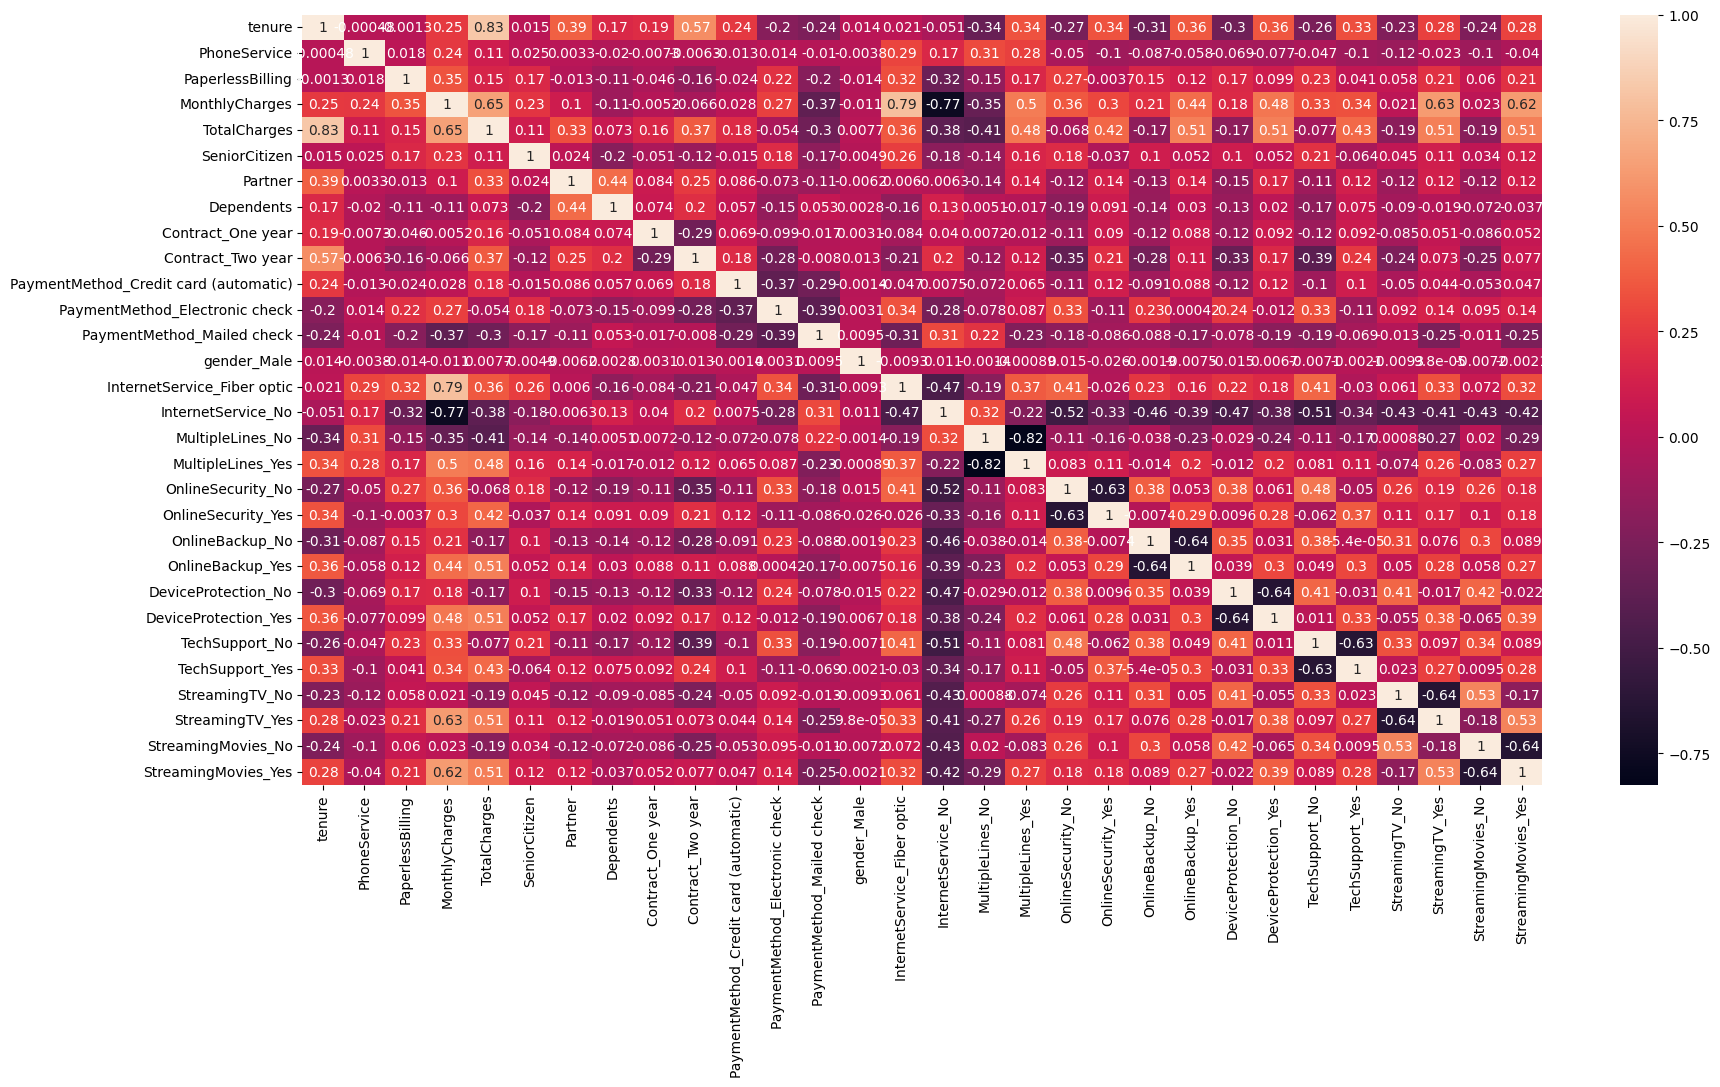

In [37]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [38]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], axis = 1)

X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], axis = 1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

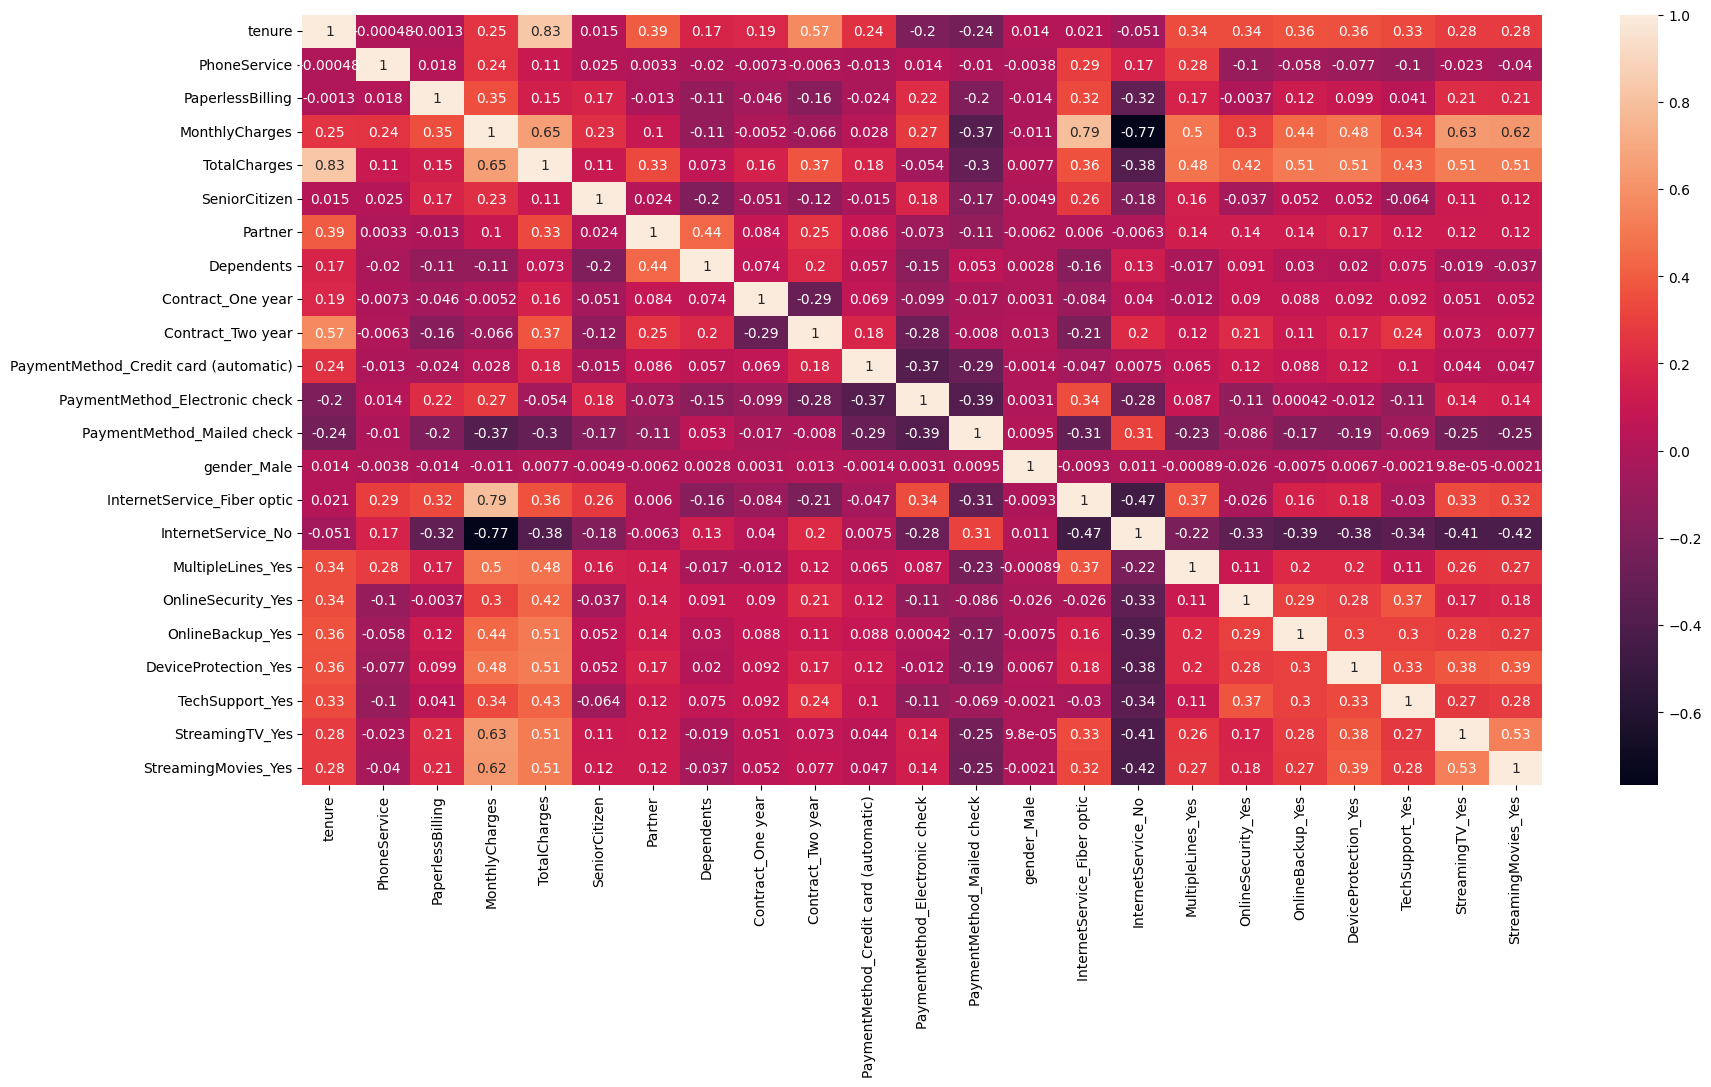

In [39]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [40]:
import statsmodels.api as sm

#X_train.info()
bool_list = X_train.select_dtypes(include=[bool]).columns
X_train[bool_list] = X_train[bool_list].astype(int)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 879 to 5649
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 4922 non-null   float64
 1   PhoneService                           4922 non-null   int64  
 2   PaperlessBilling                       4922 non-null   int64  
 3   MonthlyCharges                         4922 non-null   float64
 4   TotalCharges                           4922 non-null   float64
 5   SeniorCitizen                          4922 non-null   int64  
 6   Partner                                4922 non-null   int64  
 7   Dependents                             4922 non-null   int64  
 8   Contract_One year                      4922 non-null   int64  
 9   Contract_Two year                      4922 non-null   int64  
 10  PaymentMethod_Credit card (automatic)  4922 non-null   int64  
 11  Payment

In [41]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sun, 10 Aug 2025   Deviance:                       4009.4
Time:                        19:01:22   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

### Step 8: Feature Selection Using RFE

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [48]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=18)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train,y_train)

In [49]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True])

In [50]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', np.True_, np.int64(1)),
 ('PhoneService', np.True_, np.int64(1)),
 ('PaperlessBilling', np.True_, np.int64(1)),
 ('MonthlyCharges', np.True_, np.int64(1)),
 ('TotalCharges', np.True_, np.int64(1)),
 ('SeniorCitizen', np.True_, np.int64(1)),
 ('Partner', np.False_, np.int64(4)),
 ('Dependents', np.False_, np.int64(3)),
 ('Contract_One year', np.True_, np.int64(1)),
 ('Contract_Two year', np.True_, np.int64(1)),
 ('PaymentMethod_Credit card (automatic)', np.True_, np.int64(1)),
 ('PaymentMethod_Electronic check', np.True_, np.int64(1)),
 ('PaymentMethod_Mailed check', np.True_, np.int64(1)),
 ('gender_Male', np.False_, np.int64(5)),
 ('InternetService_Fiber optic', np.True_, np.int64(1)),
 ('InternetService_No', np.True_, np.int64(1)),
 ('MultipleLines_Yes', np.True_, np.int64(1)),
 ('OnlineSecurity_Yes', np.True_, np.int64(1)),
 ('OnlineBackup_Yes', np.False_, np.int64(2)),
 ('DeviceProtection_Yes', np.False_, np.int64(6)),
 ('TechSupport_Yes', np.True_, np.int64(1)),
 ('Str

In [51]:
col = X_train.columns[rfe.support_]

In [52]:
X_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'gender_Male', 'OnlineBackup_Yes',
       'DeviceProtection_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [53]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4903
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2007.1
Date:                Sun, 10 Aug 2025   Deviance:                       4014.2
Time:                        20:08:54   Pearson chi2:                 6.13e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2837
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2026      0.487     -4.524      0.000      -3.157      -1.248
tenure                                   -1.5200      0.188     -8.086      0.000      -1.888      -1.152
PhoneService                              0.0561      0.292      0.192      0.848      -0.516       0.628
PaperlessBilling                          0.3275      0.090      3.641      0.000       0.151       0.504
MonthlyCharges                           -0.8476      0.379     -2.234      0.025      -1.591      -0.104
TotalCharges                              0.7381      0.197      3.737      0.000       0.351       1.125
SeniorCitizen                             0.4211      0.100      4.218      0.000       0.225       0.617
Contract_One year                        -0.6620      0.128     -5.157      0.000      -0.914      -0.410
Contract_Two year                        -1.2448      0.211     -5.890      0.000      -1.659      -0.831
PaymentMethod_Credit card (automatic)    -0.2580      0.137     -1.888      0.059      -0.526       0.010
PaymentMethod_Electronic check            0.1583      0.112      1.407      0.159      -0.062       0.379
PaymentMethod_Mailed check               -0.2577      0.137     -1.879      0.060      -0.527       0.011
InternetService_Fiber optic               1.4186      0.329      4.309      0.000       0.773       2.064
InternetService_No                       -1.6761      0.378     -4.433      0.000      -2.417      -0.935
MultipleLines_Yes                         0.3405      0.113      3.007      0.003       0.119       0.562
OnlineSecurity_Yes                       -0.2492      0.120     -2.081      0.037      -0.484      -0.014
TechSupport_Yes                          -0.2471      0.122     -2.027      0.043      -0.486      -0.008
StreamingTV_Yes                           0.5281      0.163      3.250      0.001       0.210       0.847
StreamingMovies_Yes                       0.4168      0.159      2.623      0.009       0.105       0.728
=========================================================================================================
"""

In [54]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.193737
5790    0.283798
6498    0.622716
880     0.480125
2784    0.625109
3874    0.444748
5387    0.434743
6623    0.806223
4465    0.236160
5364    0.510917
dtype: float64

In [55]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19373663, 0.28379821, 0.62271639, 0.48012495, 0.62510897,
       0.44474822, 0.43474265, 0.80622307, 0.23615995, 0.51091675])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [56]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.193737,879
1,0,0.283798,5790
2,1,0.622716,6498
3,1,0.480125,880
4,1,0.625109,2784


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [57]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.193737,879,0
1,0,0.283798,5790,0
2,1,0.622716,6498,1
3,1,0.480125,880,0
4,1,0.625109,2784,1


In [58]:
from sklearn import metrics

In [59]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3277  358]
 [ 583  704]]


In [60]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [63]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8088175538399025


#### Checking VIFs

In [64]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,MonthlyCharges,16.54
4,TotalCharges,10.62
1,PhoneService,9.55
0,tenure,7.49
11,InternetService_Fiber optic,7.31
12,InternetService_No,6.64
7,Contract_Two year,3.41
16,StreamingTV_Yes,2.94
2,PaperlessBilling,2.94
17,StreamingMovies_Yes,2.93


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [66]:
col = col.drop('PhoneService', 1)
col

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [67]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4904
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2007.1
Date:                Sun, 10 Aug 2025   Deviance:                       4014.3
Time:                        22:00:37   Pearson chi2:                 6.13e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2837
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.1190      0.218     -9.709      0.000      -2.547      -1.691
tenure                                   -1.5216      0.188     -8.102      0.000      -1.890      -1.153
PaperlessBilling                          0.3275      0.090      3.641      0.000       0.151       0.504
MonthlyCharges                           -0.7870      0.211     -3.733      0.000      -1.200      -0.374
TotalCharges                              0.7360      0.197      3.733      0.000       0.350       1.122
SeniorCitizen                             0.4207      0.100      4.215      0.000       0.225       0.616
Contract_One year                        -0.6630      0.128     -5.168      0.000      -0.914      -0.412
Contract_Two year                        -1.2459      0.211     -5.897      0.000      -1.660      -0.832
PaymentMethod_Credit card (automatic)    -0.2587      0.137     -1.892      0.058      -0.527       0.009
PaymentMethod_Electronic check            0.1582      0.112      1.407      0.160      -0.062       0.379
PaymentMethod_Mailed check               -0.2574      0.137     -1.877      0.061      -0.526       0.011
InternetService_Fiber optic               1.3734      0.231      5.952      0.000       0.921       1.826
InternetService_No                       -1.6167      0.218     -7.418      0.000      -2.044      -1.190
MultipleLines_Yes                         0.3324      0.105      3.160      0.002       0.126       0.539
OnlineSecurity_Yes                       -0.2591      0.108     -2.398      0.017      -0.471      -0.047
TechSupport_Yes                          -0.2574      0.109     -2.352      0.019      -0.472      -0.043
StreamingTV_Yes                           0.5064      0.117      4.325      0.000       0.277       0.736
StreamingMovies_Yes                       0.3956      0.114      3.457      0.001       0.171       0.620
=========================================================================================================
"""

In [68]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [69]:
y_train_pred[:10]

array([0.19366416, 0.28632329, 0.62777572, 0.48339609, 0.62507678,
       0.44184061, 0.43668191, 0.80644326, 0.23812581, 0.51248746])

In [70]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [71]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.193664,879,0
1,0,0.286323,5790,0
2,1,0.627776,6498,1
3,1,0.483396,880,0
4,1,0.625077,2784,1


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,16.35
3,TotalCharges,10.52
0,tenure,7.45
10,InternetService_Fiber optic,6.81
11,InternetService_No,5.56
6,Contract_Two year,3.28
15,StreamingTV_Yes,2.93
16,StreamingMovies_Yes,2.93
1,PaperlessBilling,2.80
8,PaymentMethod_Electronic check,2.71


In [73]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [74]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4905
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2014.4
Date:                Sun, 10 Aug 2025   Deviance:                       4028.9
Time:                        22:12:40   Pearson chi2:                 5.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2815
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0511      0.216     -9.513      0.000      -2.474      -1.629
tenure                                   -0.8798      0.066    -13.245      0.000      -1.010      -0.750
PaperlessBilling                          0.3171      0.090      3.534      0.000       0.141       0.493
MonthlyCharges                           -0.5333      0.197     -2.702      0.007      -0.920      -0.146
SeniorCitizen                             0.4313      0.100      4.301      0.000       0.235       0.628
Contract_One year                        -0.6622      0.127     -5.201      0.000      -0.912      -0.413
Contract_Two year                        -1.2137      0.209     -5.813      0.000      -1.623      -0.805
PaymentMethod_Credit card (automatic)    -0.2569      0.137     -1.880      0.060      -0.525       0.011
PaymentMethod_Electronic check            0.1696      0.113      1.507      0.132      -0.051       0.390
PaymentMethod_Mailed check               -0.1994      0.136     -1.471      0.141      -0.465       0.066
InternetService_Fiber optic               1.3153      0.228      5.777      0.000       0.869       1.761
InternetService_No                       -1.4495      0.211     -6.875      0.000      -1.863      -1.036
MultipleLines_Yes                         0.3413      0.105      3.251      0.001       0.136       0.547
OnlineSecurity_Yes                       -0.2575      0.108     -2.382      0.017      -0.469      -0.046
TechSupport_Yes                          -0.2579      0.110     -2.355      0.019      -0.473      -0.043
StreamingTV_Yes                           0.5058      0.116      4.356      0.000       0.278       0.733
StreamingMovies_Yes                       0.3966      0.114      3.490      0.000       0.174       0.619
=========================================================================================================
"""

In [76]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [77]:
y_train_pred[:10]

array([0.2262135 , 0.33556913, 0.63934219, 0.5357569 , 0.65913803,
       0.4142556 , 0.37591805, 0.80981239, 0.26737569, 0.53108122])

In [78]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [79]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.226213,879,0
1,0,0.335569,5790,0
2,1,0.639342,6498,1
3,1,0.535757,880,1
4,1,0.659138,2784,1


In [80]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8075985371800082


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,12.33
9,InternetService_Fiber optic,6.68
10,InternetService_No,5.43
5,Contract_Two year,3.26
15,StreamingMovies_Yes,2.93
14,StreamingTV_Yes,2.93
1,PaperlessBilling,2.80
7,PaymentMethod_Electronic check,2.71
0,tenure,2.49
11,MultipleLines_Yes,2.47


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [82]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3280,  355],
       [ 592,  695]])

In [83]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692  

In [84]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8075985371800082

## Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [85]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [86]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

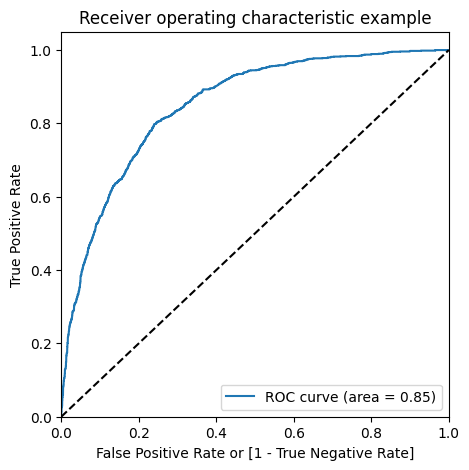

In [87]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

## Precision and Recall

In [ ]:
#Looking at the confusion matrix again

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

##### Precision
TP / TP + FP

In [ ]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

##### Recall
TP / TP + FN

In [ ]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

Using sklearn utilities for the same

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
?precision_score

In [ ]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

In [ ]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Churn, y_train_pred_final.predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [ ]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [ ]:
X_test = X_test[col]
X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)